I wanted to be able to show different trends that are occuring in the local market for Real Estate. I have access to the metrolist services being a real estate agent, and so the data is from there. This notebook shows insights that a real estate agent might have looking at certain trends that are occuring in the market. I use pandas to read and manipulate the data and use matplotlib to help plot the data. When I exported the data from the metrolist into a csv file, I noticed that some of the zip codes were inputted incorrectly. To remedy this, I used pivot tables in excel to see which zip codes got labeled incorrectly, find their corresponding address, and correct the zip code. This little bit of cleaning helped differentiate the different zip codes in the area, and then was ready to be worked on.  

In [1]:
import pandas as pd
import csv as csv
import numpy as np
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt

In [2]:
train_20901 = pd.read_csv('C:/Users/Damanjit/Documents/marketTrends/data/area20901.csv')

In [3]:
train_20901.head()

,Address,Address - Zip Code,Listing Date,Listing Price,Pending Date,Price Per Sq Ft,Selling Date,Selling Price
0,"554 N Loma Dr Lodi, CA 95242",95242,1/13/2012,15000,10/15/2012,18.09,10/31/2012,11000
1,"224 Rush St Lodi, CA 95240-2326",95240,2/14/2011,67900,4/19/2011,13.18,6/2/2011,15000
2,"322-1/2 E Elm St Lodi, CA 95240-2308",95240,12/18/2008,31900,3/30/2009,34.54,4/24/2009,20000
3,"325-1/2 Hilborn St Lodi, CA 95240-4139",95240,8/24/2011,22000,8/29/2011,45.19,10/20/2011,23500
4,"333 E Elm St Lodi, CA 95240-2307",95240,7/15/2012,25000,10/17/2012,50.30,10/26/2012,25000


In [4]:
#Need to create Days on Market for training data
train_20901['Listing Date'] = pd.to_datetime(train_20901['Listing Date'])
train_20901['Pending Date'] = pd.to_datetime(train_20901['Pending Date'])
train_20901['Selling Date'] = pd.to_datetime(train_20901['Selling Date'])

train_20901['Days on Market'] = train_20901['Pending Date'] - train_20901['Listing Date']
train_20901['Days on Market'] = (train_20901['Days on Market'] / np.timedelta64(1, 'D')).astype(int)

In [5]:
train_20901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 9 columns):
Address               6185 non-null object
Address - Zip Code    6185 non-null int64
Listing Date          6185 non-null datetime64[ns]
Listing Price         6185 non-null int64
Pending Date          6185 non-null datetime64[ns]
Price Per Sq Ft       6185 non-null float64
Selling Date          6185 non-null datetime64[ns]
Selling Price         6185 non-null int64
Days on Market        6185 non-null int32
dtypes: datetime64[ns](3), float64(1), int32(1), int64(3), object(1)
memory usage: 410.8+ KB


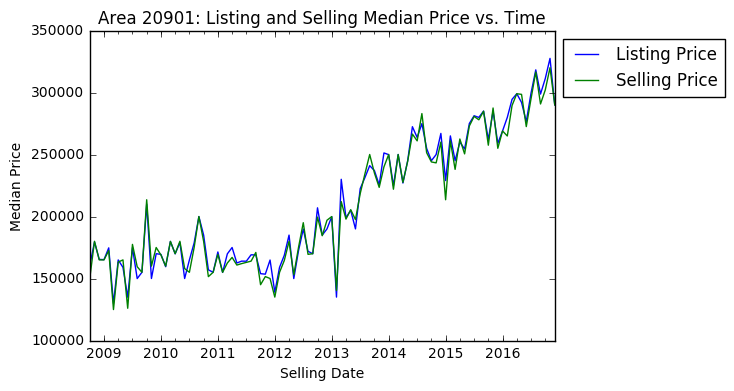

In [6]:
all_zipcodes = train_20901.set_index('Selling Date').resample('M').median()
all_zipcodes.plot(y = ['Listing Price', 'Selling Price'])
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel('Median Price')
plt.title('Area 20901: Listing and Selling Median Price vs. Time')
plt.show()

First I combined all the different zip codes to show the general trend of where prices against time are heading. I can see that there is a general increase, with the median home price a little bit under 300,000 dollars currently. Sometimes the selling price is below the listing price, indicating a buyer's market, and sometimes the selling price is above or at par the listing price, indicating a seller's market.  

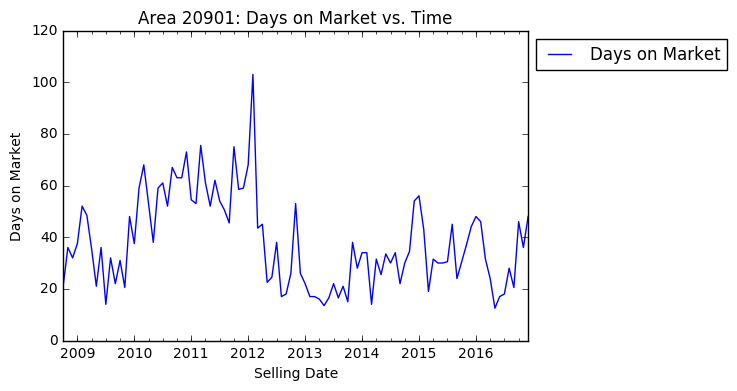

In [7]:
all_zipcodes.plot(y = ['Days on Market'])
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel('Days on Market')
plt.title('Area 20901: Days on Market vs. Time')
plt.show()

The days on the market are important because it indicates how "hot" the market is. If there is a large demand on homes, then the days on the market will be low, while if the demand is not as high, then the days on the market will increase. Here, I can see that there is a decrease compared to 2012, but fluctuates from time periods. A longer time period with more data points will give a better idea on where the trend is heading. 

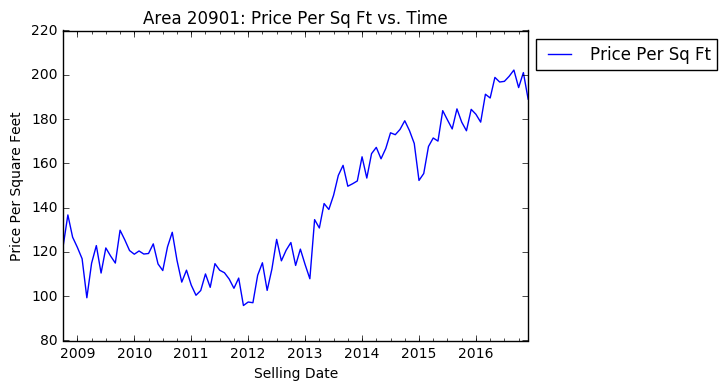

In [8]:
all_zipcodes.plot(y = ['Price Per Sq Ft'])
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel('Price Per Square Feet')
plt.title('Area 20901: Price Per Sq Ft vs. Time')
plt.show()

This plot does a good job of showing a trend of price per square feet of a home over time. Since 2009 to 2012, I can see that there was a small decrease, then a gradual increase from 2012 to today. Currently, the market shows that the median price per square feet is around 190 dollars for homes in the Lodi/Woodbridge area (Area 20901). 

In [9]:
resampled = train_20901.set_index('Selling Date').groupby('Address - Zip Code').resample('2M').median()

In [10]:
resampled.drop('Address - Zip Code', axis = 1, inplace = True)

In [11]:
resampled

Days on Market  Listing Price  \
Address - Zip Code Selling Date                                  
95240              2008-10-31              18.5         109950   
                   2008-12-31              22.0         136900   
                   2009-02-28              36.0         135700   
                   2009-04-30              39.0         127450   
                   2009-06-30              31.0         126950   
                   2009-08-31              20.0         139900   
                   2009-10-31              23.5         149900   
                   2009-12-31              23.0         138250   
                   2010-02-28              25.0         124000   
                   2010-04-30              55.5         149900   
                   2010-06-30              51.5         145000   
                   2010-08-31              50.5         134750   
                   2010-10-31              63.5         159900   
                   2010-12-31              70.0         129000   
                   2011-02-28              60.0         149900   
                   2011-04-30              62.5         146200   
                   2011-06-30              63.0         115900   
                   2011-08-31              48.0         134485   
                   2011-10-31              64.0         114900   
                   2011-12-31              59.0         144500   
                   2012-02-29              80.0         129000   
                   2012-04-30              32.5         149475   
                   2012-06-30              23.0         148700   
                   2012-08-31              34.0         145000   
                   2012-10-31              23.0         148000   
                   2012-12-31              39.0         155900   
                   2013-02-28              18.0         137000   
                   2013-04-30              14.0         169000   
                   2013-06-30              17.0         172725   
                   2013-08-31              16.0         169950   
...                                         ...            ...   
95258              2012-02-29              81.0         367000   
                   2012-04-30              25.0         223250   
                   2012-06-30              29.5         140950   
                   2012-08-31              50.0         269900   
                   2012-10-31              11.5         334700   
                   2012-12-31              29.0         226100   
                   2013-02-28              14.0         426450   
                   2013-04-30              15.5         232425   
                   2013-06-30               5.0         329000   
                   2013-08-31              18.5         280000   
                   2013-10-31              23.0         359950   
                   2013-12-31              35.5         387000   
                   2014-02-28              55.0         245000   
                   2014-04-30               8.0         350000   
                   2014-06-30              41.0         430000   
                   2014-08-31              23.0         245000   
                   2014-10-31              56.5         329450   
                   2014-12-31              77.0         379000   
                   2015-02-28             145.5         499900   
                   2015-04-30              32.0         347600   
                   2015-06-30              58.0         230000   
                   2015-08-31               5.0         340000   
                   2015-10-31              18.5         389450   
                   2015-12-31              11.0         247000   
                   2016-02-29              75.0         412450   
                   2016-04-30              10.0         267900   
                   2016-06-30              60.0         425000   
                   2016-08-31              15.0         342950   
       

In [12]:
plt.figure()

In [13]:
resampled.unstack(level = 0).plot(y = ['Listing Price', 'Selling Price'])

In [14]:
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [15]:
plt.ylabel('Median Prices')
plt.title('Area 20901: Listing and Selling Median Prices Vs. Time')

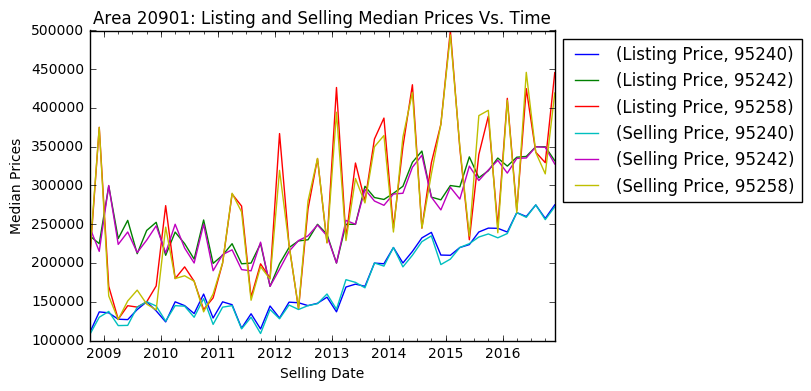

In [16]:
plt.show()

Now, I am splitting the area into its respective zip codes. The listing and selling median prices for the zip code 95258 is fluctuating frequently. This is due to the small amount of sample data points, meaning that not many houses are sold or listed in that area. I can see that the listing and selling prices are favorably close to each other, almost overlapping, but there are instances when the selling price is below the listing price. This type of instance indicates that the market is in a buyer's market, where the resources are plentiful and the consumers can keep the prices of goods down. When looking at the general trend for the other two zip codes, I notice that there is a gradual incline in the prices. This is indication that the economy was most likely recovering from the housing bubble that occured in 2008. Of course, my data only goes back to 10/22/2008, but if I were to have data that goes well in the past, it could be shown that the prices were lower in the 2008 era. The 95242 zip codes has house prices that are generally much more than housing prices in the 95240 zip code. This is primarily due to the fact that there are more newer houses in the 95242 zip code. 

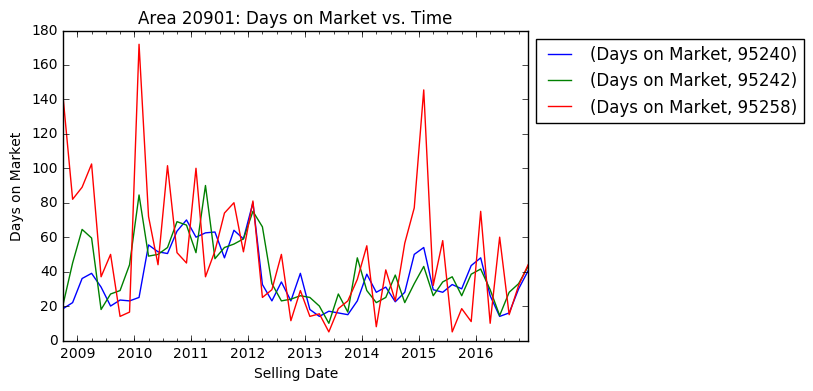

In [17]:
plt.figure()
resampled.unstack(level = 0).plot(y = ['Days on Market'])
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel('Days on Market')
plt.title('Area 20901: Days on Market vs. Time')
plt.show()

Days on the Market is a particularly important feature. Typically the longer a house stays on the market, the more likely the house is going to be sold below the listing price, or said another way, below what the seller thinks is the market value for the home. In the 2011 and 2012 period, I see that the days on the market is around 60-80 days compared to 2014, where it is between 20-40 days. When looking at the selling price vs. the listing price, I can see that in the 2011-2012 period, the selling price is below the listing price, but in the 2013-2014 period, the selling price is above or at par the listing price. This further proves that days on the market is an important feature in determing what price a house might sell for. If a seller sees that the days on the market for his area at a particular time is low, then the seller might want to also post his house for sale knowing that he will get either a better offer or an offer that he's asking for. 

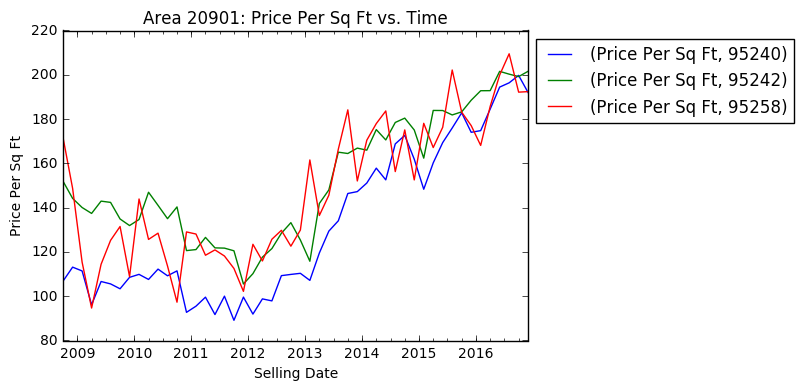

In [18]:
plt.figure()
resampled.unstack(level = 0).plot(y = ['Price Per Sq Ft'])
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel('Price Per Sq Ft')
plt.title('Area 20901: Price Per Sq Ft vs. Time')
plt.show()

From this I can see that the value of a home is increasing over time since late 2008. The 95242 area still has the highest price per square feet compared to the other two zip codes. Price per square feet is an important indicator of what a potential seller might price his home at. If the seller sees that the current price per square feet's median is around 200 dollars and he has a 2000 square feet house, he might think about listing his property at 400,000 dollars. Of course, the better way to do it is to see similar properties that are sold within a nearby area in the past 6 months, and average out the price per square feet, then apply that number to the square footage of his house to get a more accurate listing price for his home. 

In [19]:
#Try to showcase a different area and see what kind of market trends that it might show. 
train_20705 = pd.read_csv('C:/Users/Damanjit/Documents/marketTrends/data/area20705.csv')
#Need to create Days on Market for training data
train_20705['Listing Date'] = pd.to_datetime(train_20705['Listing Date'])
train_20705['Pending Date'] = pd.to_datetime(train_20705['Pending Date'])
train_20705['Selling Date'] = pd.to_datetime(train_20705['Selling Date'])

train_20705['Days on Market'] = train_20705['Pending Date'] - train_20705['Listing Date']
train_20705['Days on Market'] = (train_20705['Days on Market'] / np.timedelta64(1, 'D')).astype(int)
train_20705.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10118 entries, 0 to 10117
Data columns (total 9 columns):
Address               10118 non-null object
Address - Zip Code    10118 non-null int64
Listing Date          10118 non-null datetime64[ns]
Listing Price         10118 non-null int64
Pending Date          10118 non-null datetime64[ns]
Price Per Sq Ft       10118 non-null float64
Selling Date          10118 non-null datetime64[ns]
Selling Price         10118 non-null int64
Days on Market        10118 non-null int32
dtypes: datetime64[ns](3), float64(1), int32(1), int64(3), object(1)
memory usage: 672.0+ KB


In [20]:
#Use resample and groupby to set index of dataframe as the selling date and group by various zip codes. Resample every 2 months. 
resampled_20705 = train_20705.set_index('Selling Date').groupby('Address - Zip Code').resample('2M').median()
resampled_20705.drop('Address - Zip Code', axis = 1, inplace = True)
resampled_20705

Days on Market  Listing Price  \
Address - Zip Code Selling Date                                  
95207              2008-10-31              12.0         105900   
                   2008-12-31              24.0         100000   
                   2009-02-28              35.0          92400   
                   2009-04-30              52.0          69900   
                   2009-06-30              41.5          74900   
                   2009-08-31              26.0          85000   
                   2009-10-31              22.0          85000   
                   2009-12-31              27.0          99000   
                   2010-02-28              31.0          95000   
                   2010-04-30              18.0          85900   
                   2010-06-30              13.5          92450   
                   2010-08-31              32.0          99900   
                   2010-10-31              60.0          99900   
                   2010-12-31              46.0          89000   
                   2011-02-28              79.0          74900   
                   2011-04-30              47.5          89950   
                   2011-06-30              21.0          92499   
                   2011-08-31              27.5          89975   
                   2011-10-31              38.0          89900   
                   2011-12-31              42.0          88250   
                   2012-02-29              41.0         100000   
                   2012-04-30              52.0          78900   
                   2012-06-30              35.5          85500   
                   2012-08-31              43.0          90000   
                   2012-10-31              17.0         109000   
                   2012-12-31              22.0         115000   
                   2013-02-28              43.0         109525   
                   2013-04-30              22.0         119450   
                   2013-06-30              23.0         127500   
                   2013-08-31              26.0         123975   
...                                         ...            ...   
95212              2012-02-29              57.0         175000   
                   2012-04-30              61.5         172449   
                   2012-06-30              52.0         185000   
                   2012-08-31              62.0         174400   
                   2012-10-31              35.0         186000   
                   2012-12-31              41.0         190000   
                   2013-02-28              36.5         191736   
                   2013-04-30              26.5         204900   
                   2013-06-30              16.0         194900   
                   2013-08-31              13.5         225000   
                   2013-10-31              14.0         225900   
                   2013-12-31              30.0         250000   
                   2014-02-28              33.0         244995   
                   2014-04-30              22.0         249950   
                   2014-06-30              22.0         280000   
                   2014-08-31              29.0         285000   
                   2014-10-31              17.5         276975   
                   2014-12-31              51.0         269000   
                   2015-02-28              48.0         273750   
                   2015-04-30              58.0         285000   
                   2015-06-30              31.0         268999   
                   2015-08-31              52.0         285000   
                   2015-10-31              37.5         288000   
                   2015-12-31              24.0         296450   
                   2016-02-29              44.0         292500   
                   2016-04-30              29.0         305000   
                   2016-06-30              24.0         299999   
                   2016-08-31              32.0         312425   
       

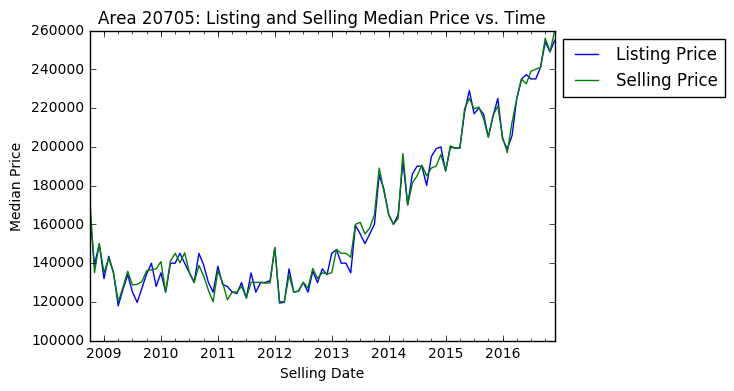

In [21]:
all_zipcodes_20705 = train_20705.set_index('Selling Date').resample('M').median()
all_zipcodes_20705.plot(y = ['Listing Price', 'Selling Price'])
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel('Median Price')
plt.title('Area 20705: Listing and Selling Median Price vs. Time')
plt.show()

IN this graph, I can see that this follows a similar trend compared to Area 20901, with the median home price increasing from 2012. The median home price is much smaller compared to Area 20901 (250,000 vs 300,000), primarily due to the difference in demand and supply between the two areas. The selling price is currently higher than the listing price meaning that this is currently a seller's market. If I were an investor, I would be cautious in investing during this time. Obviously, other factors exists besides this in determining on whether to invest or not, but this sometimes can be a good indication that this is not necessarily the best time to invest.  

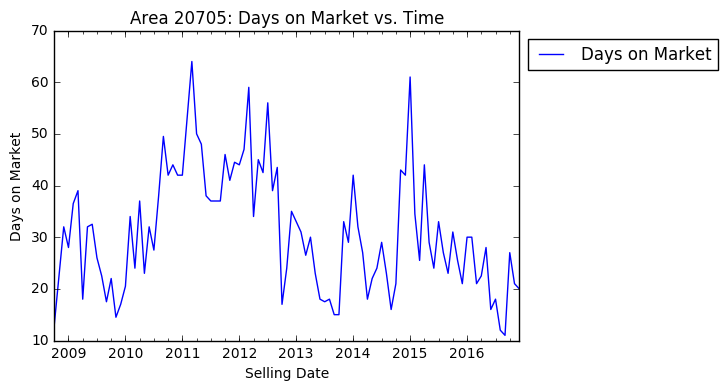

In [22]:
all_zipcodes_20705.plot(y = ['Days on Market'])
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel('Days on Market')
plt.title('Area 20705: Days on Market vs. Time')
plt.show()

Again, the days on the market is fluctuatuing, but I notice that in mid 2016, the days on the market is very low. This means that during that time houses were flying off the market, making it extra hot. Real estate agents were rejoicing during this period surely. 

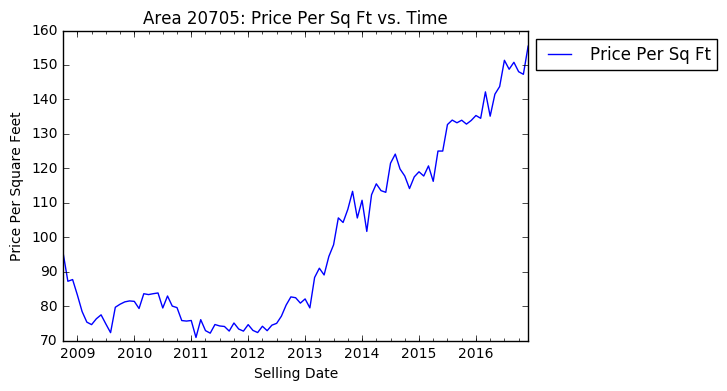

In [23]:
all_zipcodes_20705.plot(y = ['Price Per Sq Ft'])
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel('Price Per Square Feet')
plt.title('Area 20705: Price Per Sq Ft vs. Time')
plt.show()

Again, this follows a similar trend to Area 20901, where the price per square feet has been steadily increasing since 2012. Still the median price per square feet in this area (148 dollars) is much smaller compared to Area 20901 (190 dollars). This shows me that Area 20901 is probably more sought after and considered better to stay in. This could be due to crime factors, better schools, better developments, and other various factors. Now, I will split the area into its respective zip codes and see if I can find anything interesting about it. 

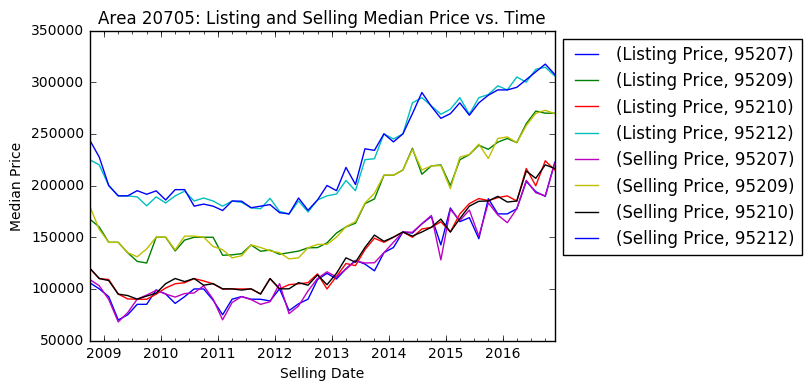

In [24]:
resampled_20705.unstack(level = 0).plot(y = ['Listing Price', 'Selling Price'])
plt.legend(loc = "upper left", bbox_to_anchor=(1,1))
plt.ylabel('Median Price')
plt.title('Area 20705: Listing and Selling Median Price vs. Time')
plt.show()

From this graph, I can see that there are distinct differences in the prices between the different zip codes. I also notice that the selling price is sometimes below the listing prices or sometimes higher than the listing price. This corresponds again to either a buyer's market or a seller's market. The 95212 zip code is nearly equivalent to what the median home prices are in the Lodi area (Zip Codes - 95242, 95240). This is because the houses that are built in the 95212 area are newer as well as higher demand to purchase compared to the other Stockton area counterparts (Zip Codes 95207, 95209, and 95210). These other zip codes often have higher crime rates, and thus decreased the demand in purchasing homes there. I do obeserve though, that the median prices are gradually increasing since 2012. 

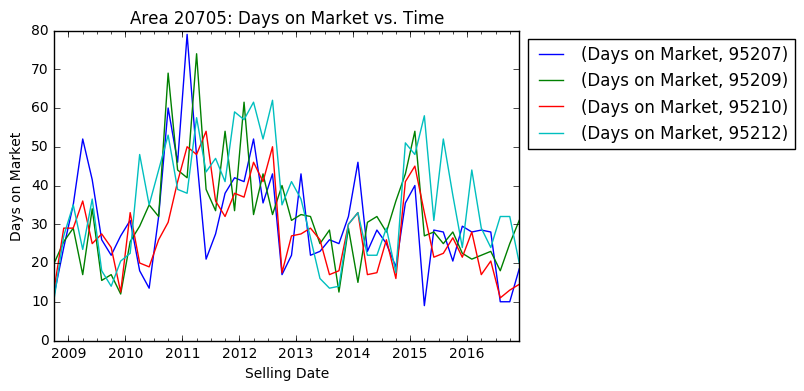

In [25]:
resampled_20705.unstack(level = 0).plot(y = ['Days on Market'])
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel('Days on Market')
plt.title('Area 20705: Days on Market vs. Time')
plt.show()

The days on the market here are fluctuating greatly, but a general trend can be observed, where again in the 2011-2012 period the days on the market were higher than the period from 2012-2013. In 2016, the days on the market is close to 20-30 days, making the market perfect for a seller. Of course, this is the case with home prices at an all time high since the housing bubble back in 2008. Showing these types of trends to potential sellers might help convince them that this a right time to buy. 

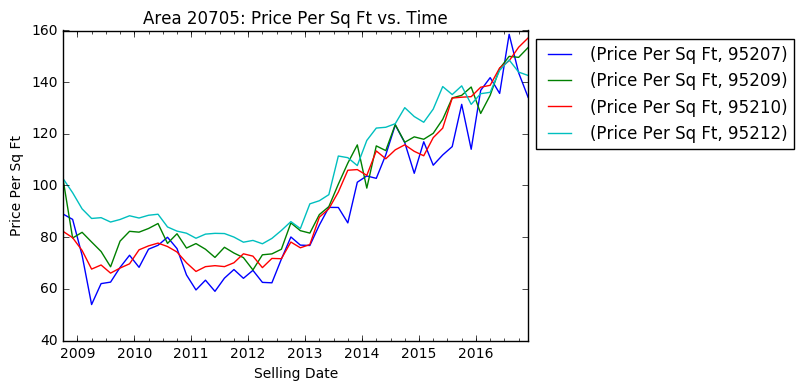

In [26]:
resampled_20705.unstack(level = 0).plot(y = ['Price Per Sq Ft'])
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel('Price Per Sq Ft')
plt.title('Area 20705: Price Per Sq Ft vs. Time')
plt.show()

Another good indication that this is a seller's market is that the price per square feet for a home is increasing and continues to increase. Since 2012, the price per sqaure feet has been on a gradual incline. When comparing the Stockton area to the Lodi area, however, I notice that the price per square feet for a home is much smaller (160 dollars compared to 200 dollars). This difference is most likely caused by the number of houses in supply to be sold or purchased in the area, otherwise known as inventory. Lodi is a small city, where the demographics mostly comprise of middle aged people who have established their careers. The inventory is normally very small, making the supply low, while demand high. This causes the price per square feet to grow higher. In a city like Stockton, where there is more inventory and more options, the price per square feet might not be as high. The main difference comes down to supply and demand, as well as the incentives to live in a place like Lodi compared to a city like Stockton. These market trends can help a client choose which places to live, what's the right to buy or sell, what they should price their home at, or even what offer should the buyer give to a seller. Simply put, these market trends offer assistance to people in understanding what decisions they should be making. This is only a small example of what simple data manipulation and plotting can do, I can do this with other areas in the central valley, or even combine data to showcase how different counties or states trends are going. In some of my data, there are not enough sample points to come up with a general trend, but for some it's just fine. 